In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [68]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('husband_wife_arguments.csv')

In [71]:
df.head()


,Argument ID,Date,Duration (minutes),Topic,Emotional Tone,Resolution Type,Mood Swing,Notes
0,1,2024-01-05,43,Parenting Styles,Disappointed,No Resolution,Mild,Discussed parenting styles for 43 minutes. Emo...
1,2,2024-02-05,24,Parenting Styles,Annoyed,Compromise,Severe,Discussed parenting styles for 24 minutes. Emo...
2,3,2024-02-27,25,Money Management,Annoyed,No Resolution,Moderate,Discussed money management for 25 minutes. Emo...
3,4,2024-02-07,20,Time Management,Angry,Resolution Discussed,Moderate,Discussed time management for 20 minutes. Emot...
4,5,2024-01-26,7,Future Goals,Frustrated,Resolution Discussed,Mild,Discussed future goals for 7 minutes. Emotiona...


In [72]:
df.tail()


,Argument ID,Date,Duration (minutes),Topic,Emotional Tone,Resolution Type,Mood Swing,Notes
1495,1496,2024-01-02,43,Parenting Styles,Calm,Compromise,Mild,Discussed parenting styles for 43 minutes. Emo...
1496,1497,2024-01-15,22,Money Management,Supportive,Apology,NaN,Discussed money management for 22 minutes. Emo...
1497,1498,2024-01-21,16,Social Activities,Happy,Resolution Discussed,Mild,Discussed social activities for 16 minutes. Em...
1498,1499,2024-01-26,12,Social Activities,Annoyed,Compromise,Mild,Discussed social activities for 12 minutes. Em...
1499,1500,2024-02-22,51,Time Management,Calm,No Resolution,NaN,Discussed time management for 51 minutes. Emot...


In [73]:
df.shape



(1500, 8)

In [74]:
df.columns


Index(['Argument ID', 'Date', 'Duration (minutes)', 'Topic', 'Emotional Tone',
       'Resolution Type', 'Mood Swing', 'Notes'],
      dtype='object')

In [75]:
df = df.drop('Argument ID', axis = 1)


In [76]:
df.duplicated().sum()


0

In [77]:
df.isnull().sum()


,0
Date,0
Duration (minutes),0
Topic,0
Emotional Tone,0
Resolution Type,0
Mood Swing,336
Notes,0


In [78]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                1500 non-null   object
 1   Duration (minutes)  1500 non-null   int64 
 2   Topic               1500 non-null   object
 3   Emotional Tone      1500 non-null   object
 4   Resolution Type     1500 non-null   object
 5   Mood Swing          1164 non-null   object
 6   Notes               1500 non-null   object
dtypes: int64(1), object(6)
memory usage: 82.2+ KB


In [79]:
df.describe()


,Duration (minutes)
count,1500.000000
mean,32.763333
std,16.379607
min,5.000000
25%,18.000000
50%,33.000000
75%,47.000000
max,60.000000


In [80]:
df['Mood Swing'].fillna('Cant Say', inplace=True)


In [81]:
df.nunique()


,0
Date,61
Duration (minutes),56
Topic,8
Emotional Tone,8
Resolution Type,4
Mood Swing,4
Notes,1484


In [82]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Date', 'Topic', 'Emotional Tone', 'Resolution Type', 'Mood Swing',
       'Notes'],
      dtype='object')

Numerical type columns:
Index(['Duration (minutes)'], dtype='object')


In [83]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [84]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [85]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Topic', 'Emotional Tone', 'Resolution Type', 'Mood Swing']
Non-Categorical Features: ['Date', 'Notes']
Discrete Features: []
Continuous Features: ['Duration (minutes)']


In [86]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Topic
['Parenting Styles' 'Money Management' 'Time Management' 'Future Goals'
 'Social Activities' 'Household Chores' 'Personal Space'
 'Family Responsibilities']

Emotional Tone
['Disappointed' 'Annoyed' 'Angry' 'Frustrated' 'Happy' 'Supportive' 'Calm'
 'Hurt']

Resolution Type
['No Resolution' 'Compromise' 'Resolution Discussed' 'Apology']

Mood Swing
['Mild' 'Severe' 'Moderate' 'Cant Say']



In [87]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Topic
Topic
Money Management           206
Family Responsibilities    200
Household Chores           197
Parenting Styles           188
Personal Space             187
Future Goals               177
Social Activities          176
Time Management            169
Name: count, dtype: int64

Emotional Tone
Emotional Tone
Angry           205
Calm            196
Frustrated      191
Supportive      189
Happy           185
Annoyed         181
Hurt            178
Disappointed    175
Name: count, dtype: int64

Resolution Type
Resolution Type
Apology                 386
Compromise              374
Resolution Discussed    373
No Resolution           367
Name: count, dtype: int64

Mood Swing
Mood Swing
Mild        403
Severe      396
Moderate    365
Cant Say    336
Name: count, dtype: int64



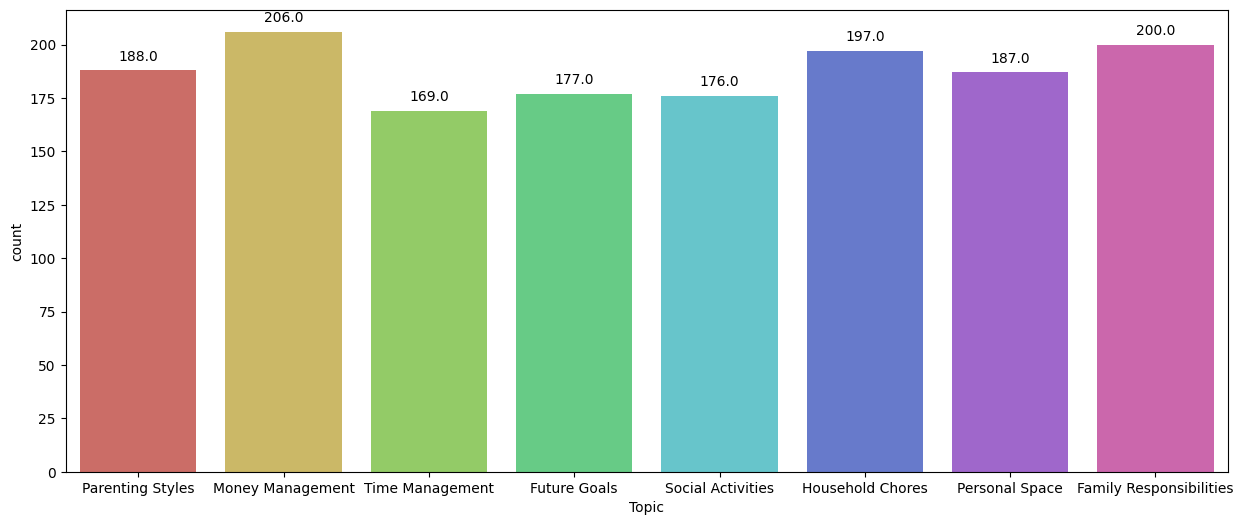

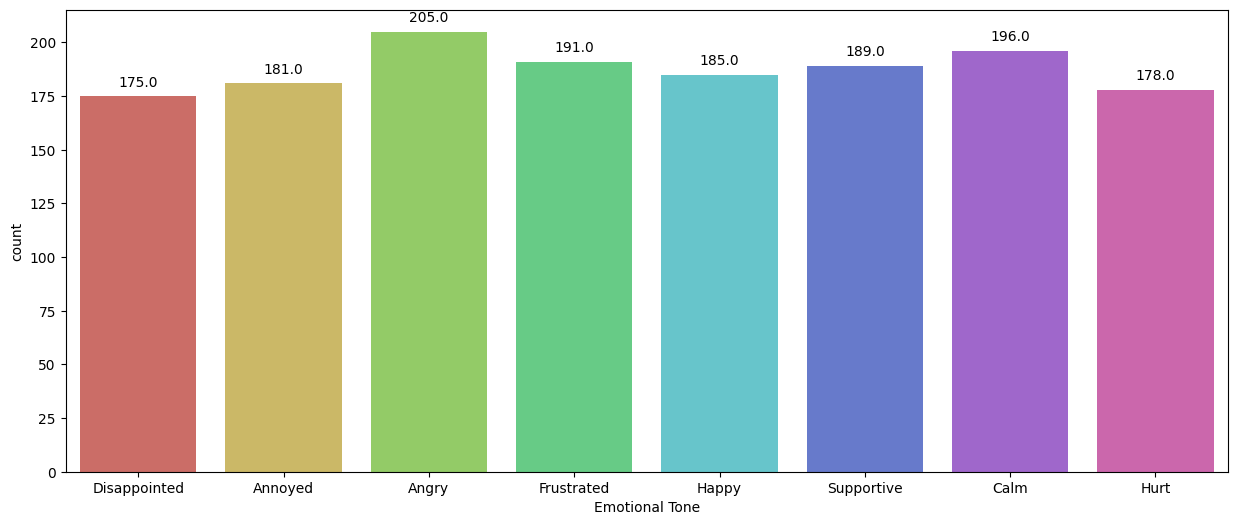

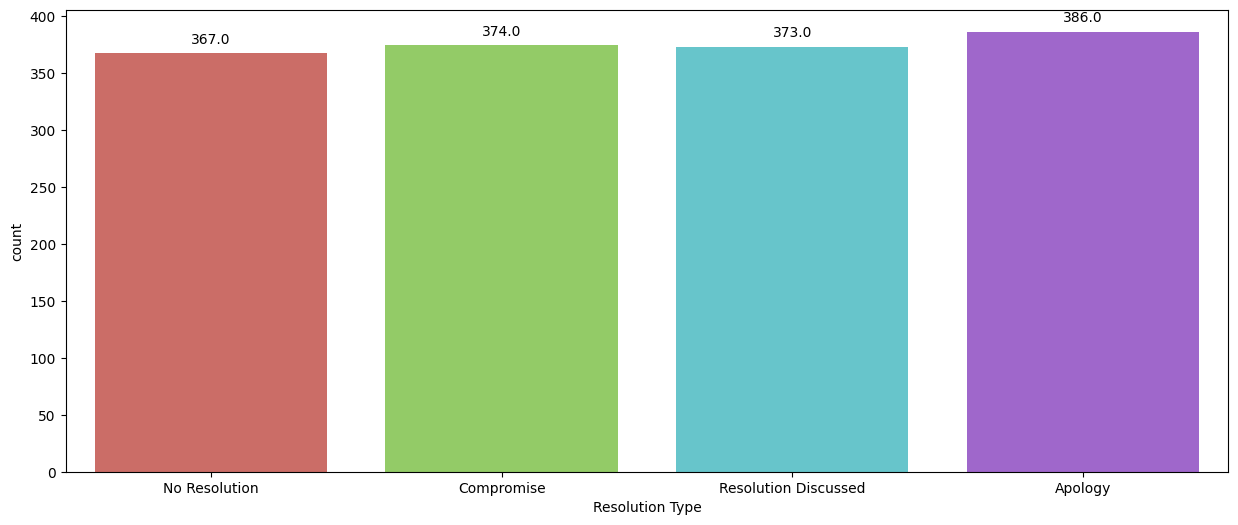

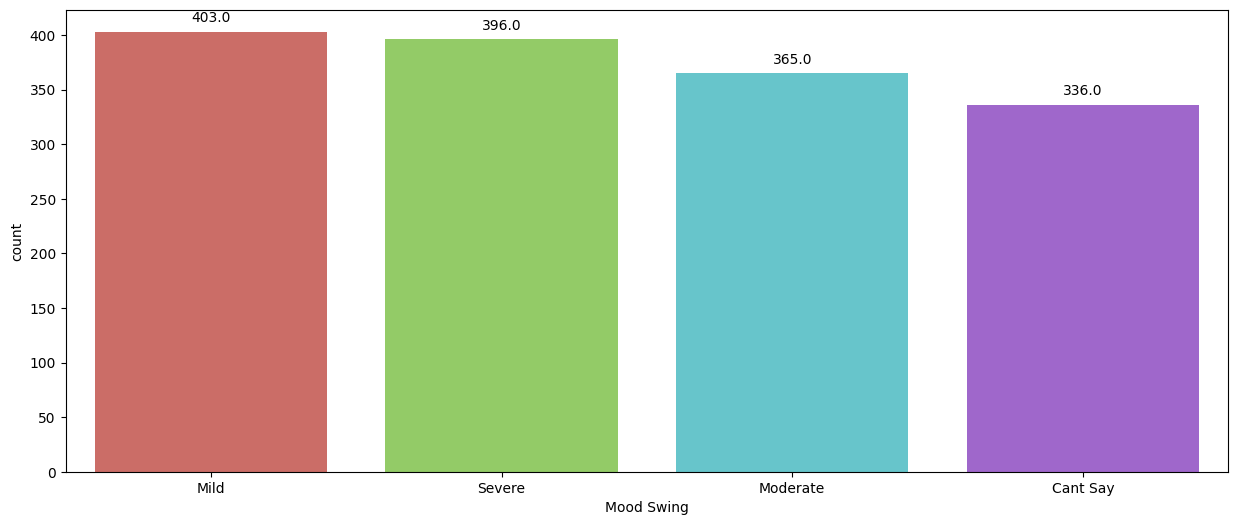

In [88]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [89]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

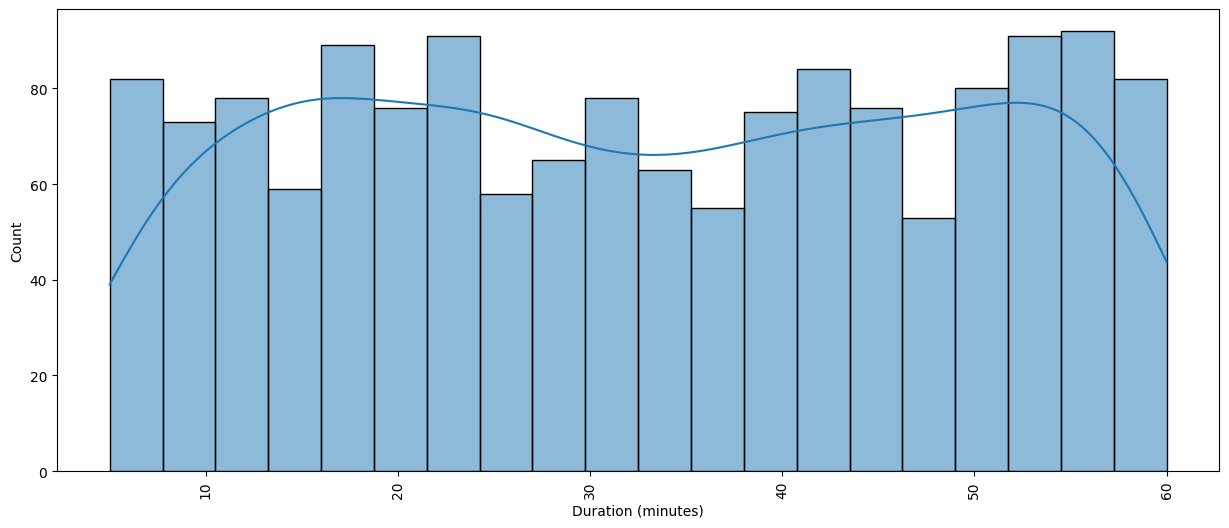

In [90]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

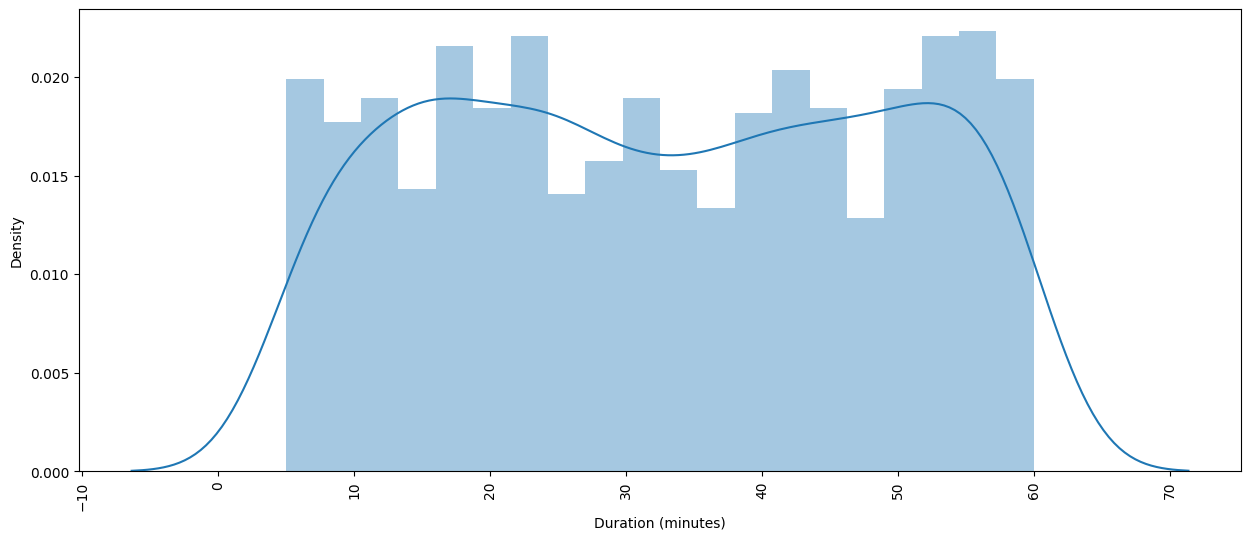

In [91]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

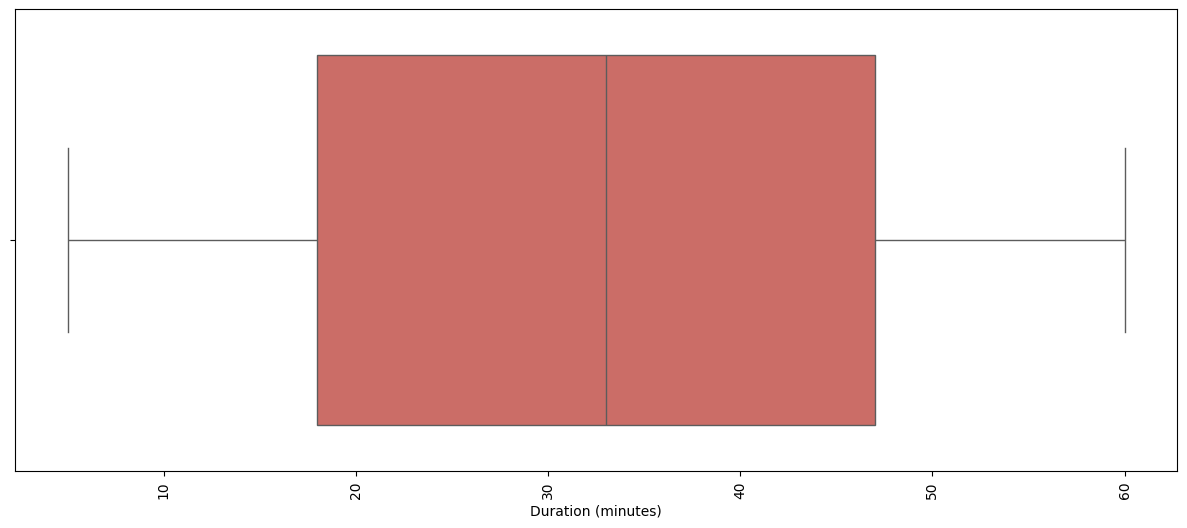

In [92]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

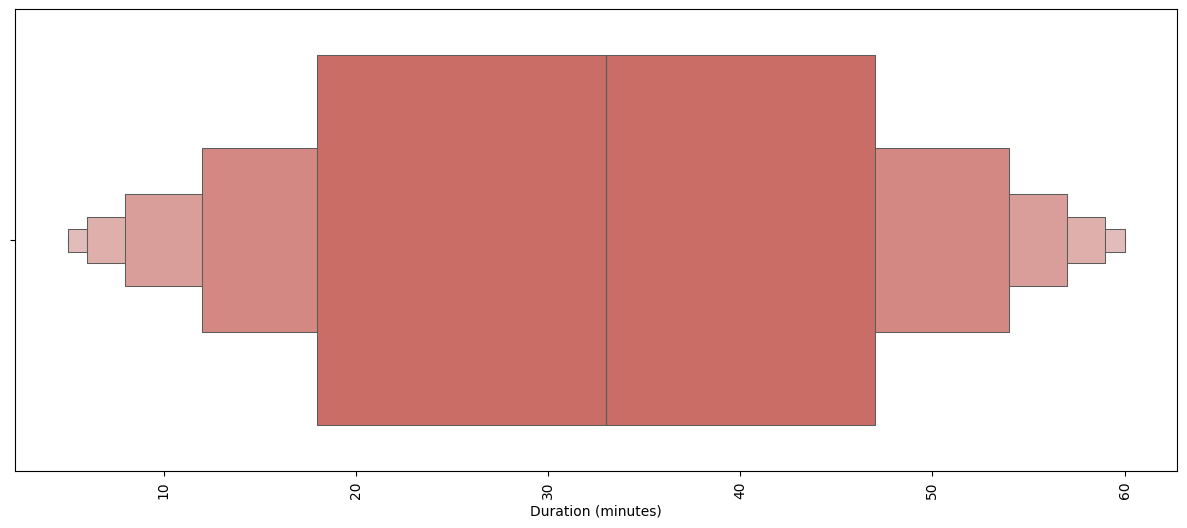

In [93]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

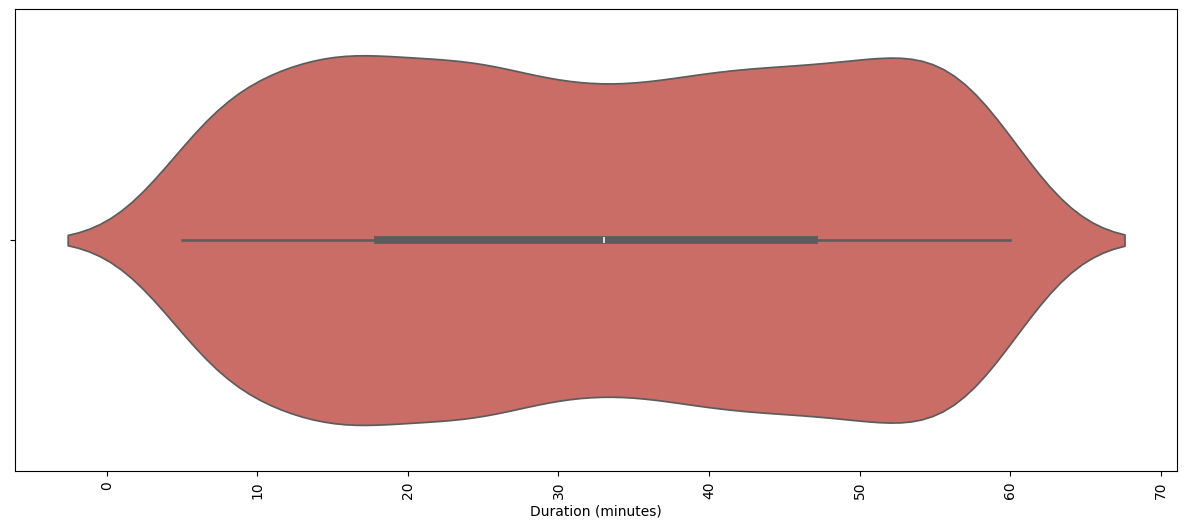

In [94]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

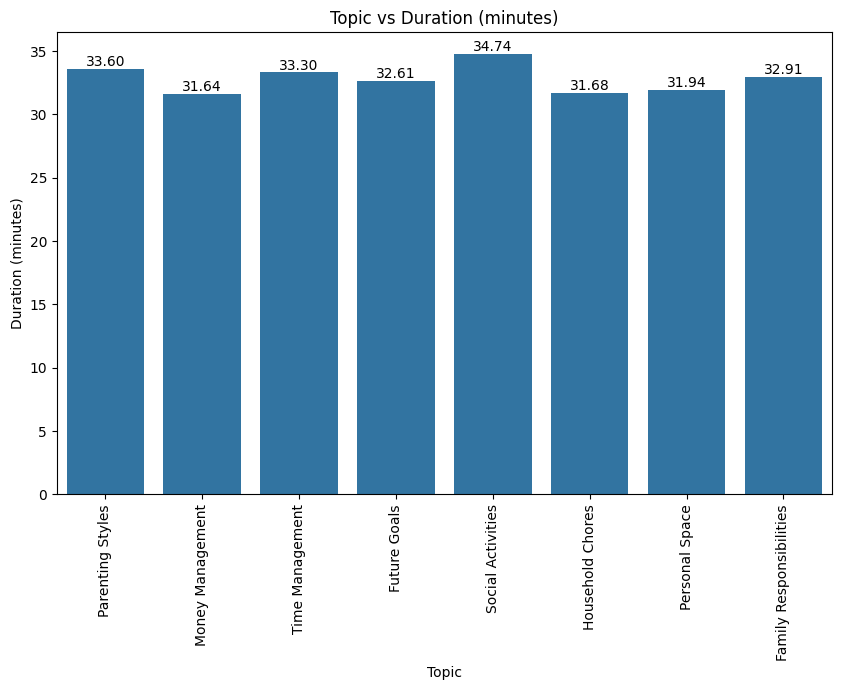

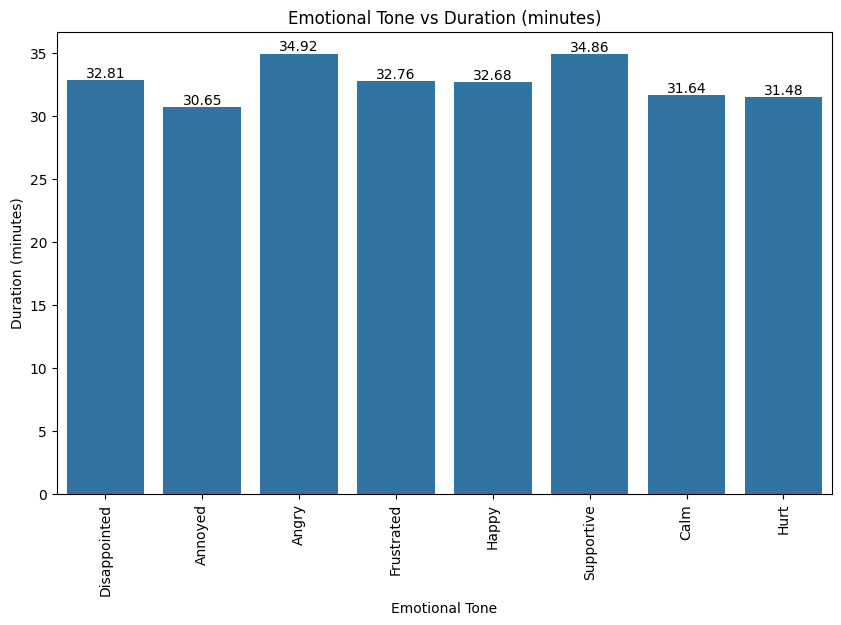

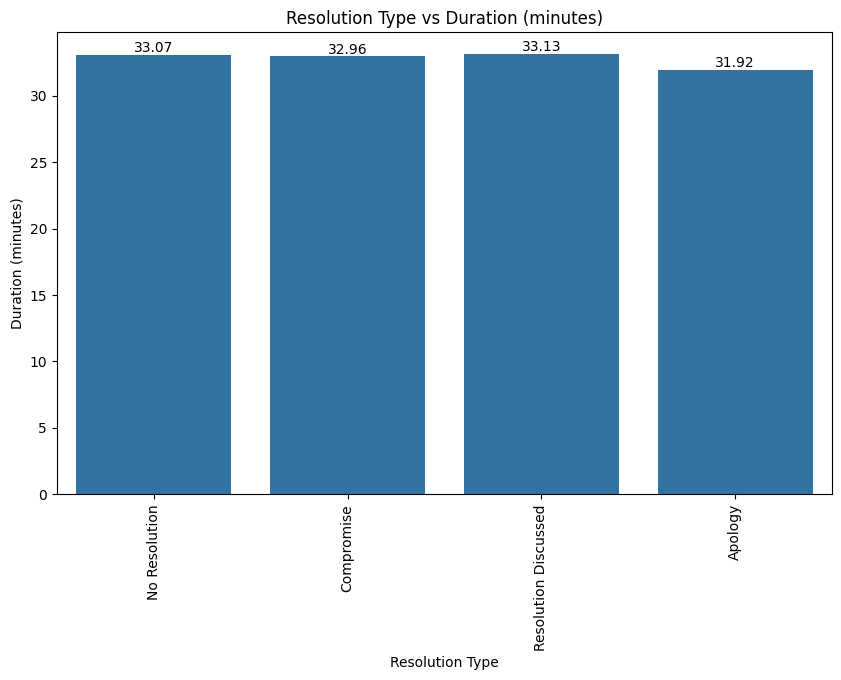

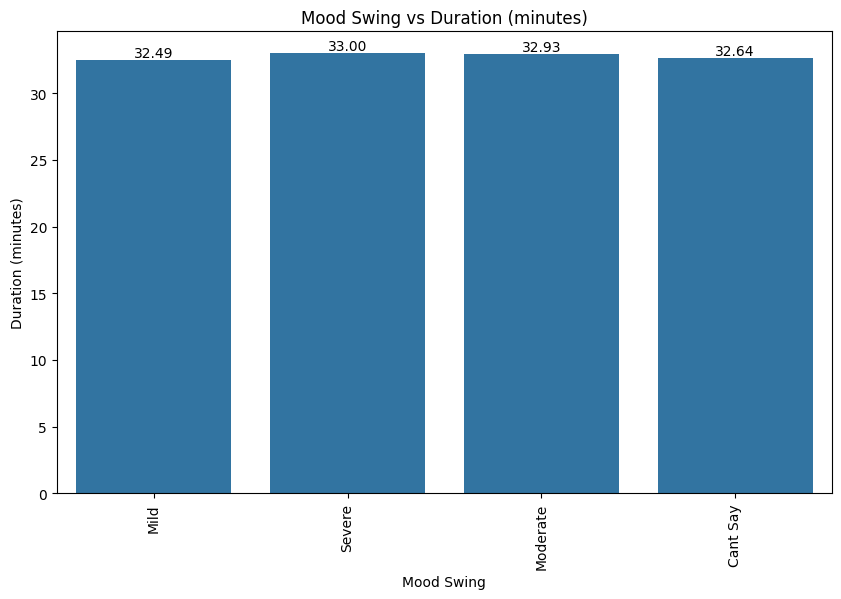

In [95]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

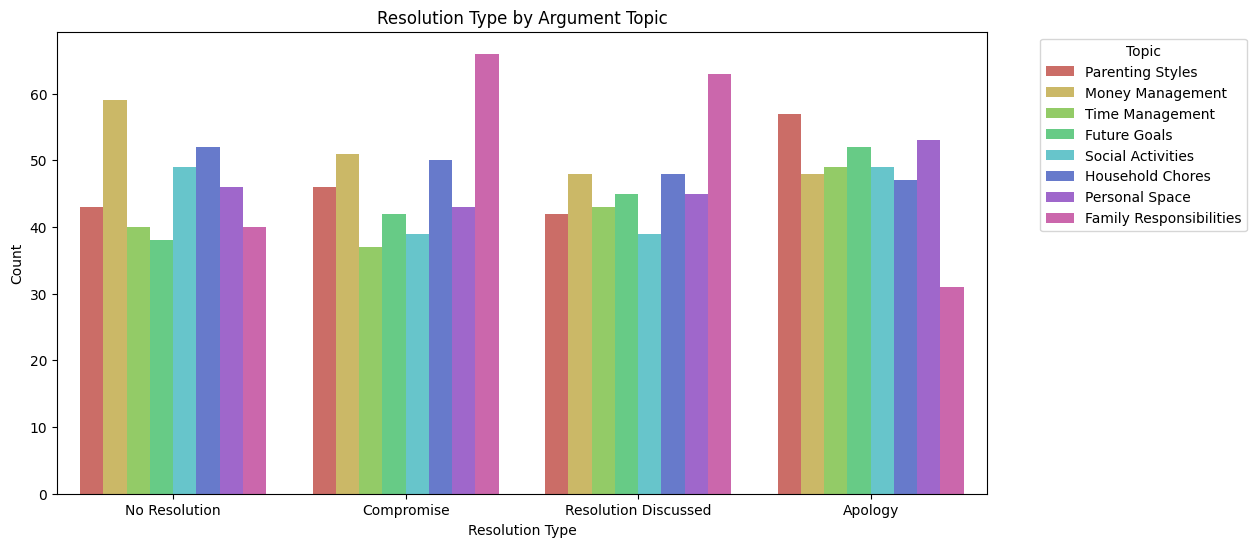

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Resolution Type', hue='Topic', data=df, palette="hls")
plt.title('Resolution Type by Argument Topic')
plt.xlabel('Resolution Type')
plt.ylabel('Count')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

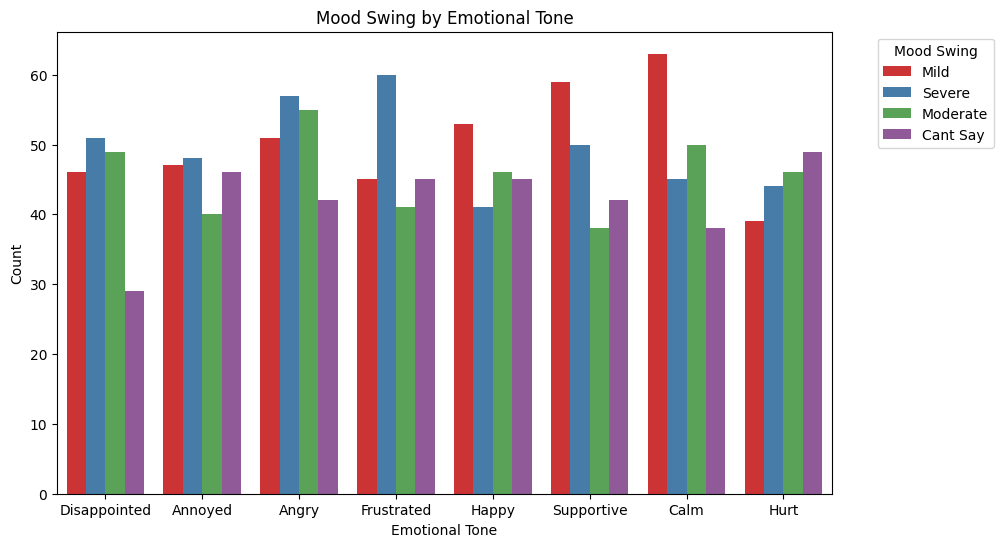

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotional Tone', hue='Mood Swing', data=df, palette="Set1")
plt.title('Mood Swing by Emotional Tone')
plt.xlabel('Emotional Tone')
plt.ylabel('Count')
plt.legend(title='Mood Swing', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

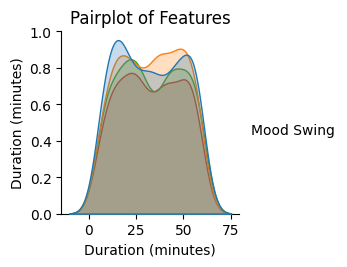

In [98]:
sns.pairplot(df, hue='Mood Swing', vars=['Duration (minutes)'])
plt.title('Pairplot of Features')
plt.show()

In [99]:
from mpl_toolkits.mplot3d import Axes3D

In [100]:
df['Topic_code'] = df['Topic'].astype('category').cat.codes
df['Resolution_code'] = df['Resolution Type'].astype('category').cat.codes
df['Mood_code'] = df['Mood Swing'].astype('category').cat.codes

In [102]:
agg_df = df.groupby(['Topic', 'Resolution Type', 'Mood Swing']).size().reset_index(name='Count')

In [103]:
agg_df

,Topic,Resolution Type,Mood Swing,Count
0,Family Responsibilities,Apology,Cant Say,4
1,Family Responsibilities,Apology,Mild,8
2,Family Responsibilities,Apology,Moderate,8
3,Family Responsibilities,Apology,Severe,11
4,Family Responsibilities,Compromise,Cant Say,14
...,...,...,...,...
123,Time Management,No Resolution,Severe,12
124,Time Management,Resolution Discussed,Cant Say,5
125,Time Management,Resolution Discussed,Mild,17
126,Time Management,Resolution Discussed,Moderate,11


In [104]:
agg_df['Topic_code'] = agg_df['Topic'].astype('category').cat.codes
agg_df['Resolution_code'] = agg_df['Resolution Type'].astype('category').cat.codes
agg_df['Mood_code'] = agg_df['Mood Swing'].astype('category').cat.codes

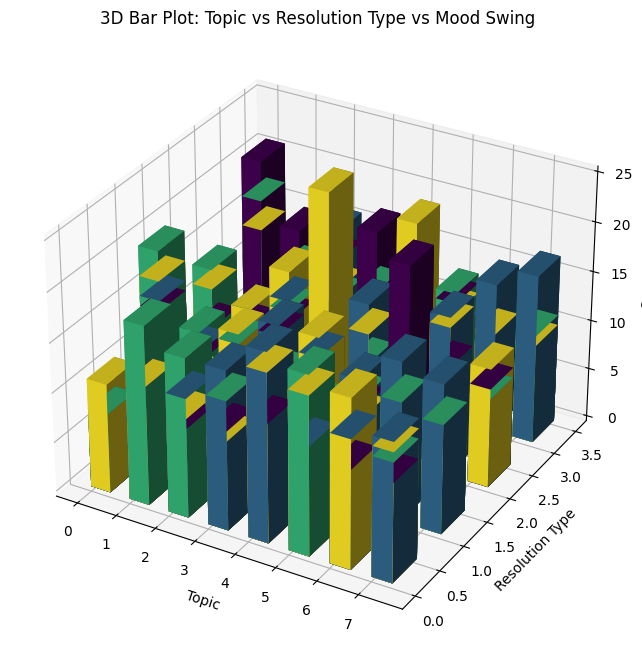

In [105]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = agg_df['Topic_code']
y = agg_df['Resolution_code']
z = np.zeros(len(agg_df))

dx = dy = 0.5
dz = agg_df['Count']

ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=plt.cm.viridis(agg_df['Mood_code'] / max(agg_df['Mood_code'])))

ax.set_xlabel('Topic')
ax.set_ylabel('Resolution Type')
ax.set_zlabel('Count')
ax.set_title('3D Bar Plot: Topic vs Resolution Type vs Mood Swing')
plt.show()

In [106]:
df


,Date,Duration (minutes),Topic,Emotional Tone,Resolution Type,Mood Swing,Notes,Topic_code,Resolution_code,Mood_code
0,2024-01-05,43,Parenting Styles,Disappointed,No Resolution,Mild,Discussed parenting styles for 43 minutes. Emo...,4,2,1
1,2024-02-05,24,Parenting Styles,Annoyed,Compromise,Severe,Discussed parenting styles for 24 minutes. Emo...,4,1,3
2,2024-02-27,25,Money Management,Annoyed,No Resolution,Moderate,Discussed money management for 25 minutes. Emo...,3,2,2
3,2024-02-07,20,Time Management,Angry,Resolution Discussed,Moderate,Discussed time management for 20 minutes. Emot...,7,3,2
4,2024-01-26,7,Future Goals,Frustrated,Resolution Discussed,Mild,Discussed future goals for 7 minutes. Emotiona...,1,3,1
...,...,...,...,...,...,...,...,...,...,...
1495,2024-01-02,43,Parenting Styles,Calm,Compromise,Mild,Discussed parenting styles for 43 minutes. Emo...,4,1,1
1496,2024-01-15,22,Money Management,Supportive,Apology,Cant Say,Discussed money management for 22 minutes. Emo...,3,0,0
1497,2024-01-21,16,Social Activities,Happy,Resolution Discussed,Mild,Discussed social activities for 16 minutes. Em...,6,3,1
1498,2024-01-26,12,Social Activities,Annoyed,Compromise,Mild,Discussed social activities for 12 minutes. Em...,6,1,1


In [107]:
df['Date'] = pd.to_datetime(df['Date'])


In [108]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [109]:
df

,Date,Duration (minutes),Topic,Emotional Tone,Resolution Type,Mood Swing,Notes,Topic_code,Resolution_code,Mood_code,Year,Month,Day,DayOfWeek,IsWeekend
0,2024-01-05,43,Parenting Styles,Disappointed,No Resolution,Mild,Discussed parenting styles for 43 minutes. Emo...,4,2,1,2024,1,5,4,0
1,2024-02-05,24,Parenting Styles,Annoyed,Compromise,Severe,Discussed parenting styles for 24 minutes. Emo...,4,1,3,2024,2,5,0,0
2,2024-02-27,25,Money Management,Annoyed,No Resolution,Moderate,Discussed money management for 25 minutes. Emo...,3,2,2,2024,2,27,1,0
3,2024-02-07,20,Time Management,Angry,Resolution Discussed,Moderate,Discussed time management for 20 minutes. Emot...,7,3,2,2024,2,7,2,0
4,2024-01-26,7,Future Goals,Frustrated,Resolution Discussed,Mild,Discussed future goals for 7 minutes. Emotiona...,1,3,1,2024,1,26,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2024-01-02,43,Parenting Styles,Calm,Compromise,Mild,Discussed parenting styles for 43 minutes. Emo...,4,1,1,2024,1,2,1,0
1496,2024-01-15,22,Money Management,Supportive,Apology,Cant Say,Discussed money management for 22 minutes. Emo...,3,0,0,2024,1,15,0,0
1497,2024-01-21,16,Social Activities,Happy,Resolution Discussed,Mild,Discussed social activities for 16 minutes. Em...,6,3,1,2024,1,21,6,1
1498,2024-01-26,12,Social Activities,Annoyed,Compromise,Mild,Discussed social activities for 12 minutes. Em...,6,1,1,2024,1,26,4,0


In [110]:
monthly_counts = df.groupby(df['Date'].dt.to_period("M")).size()

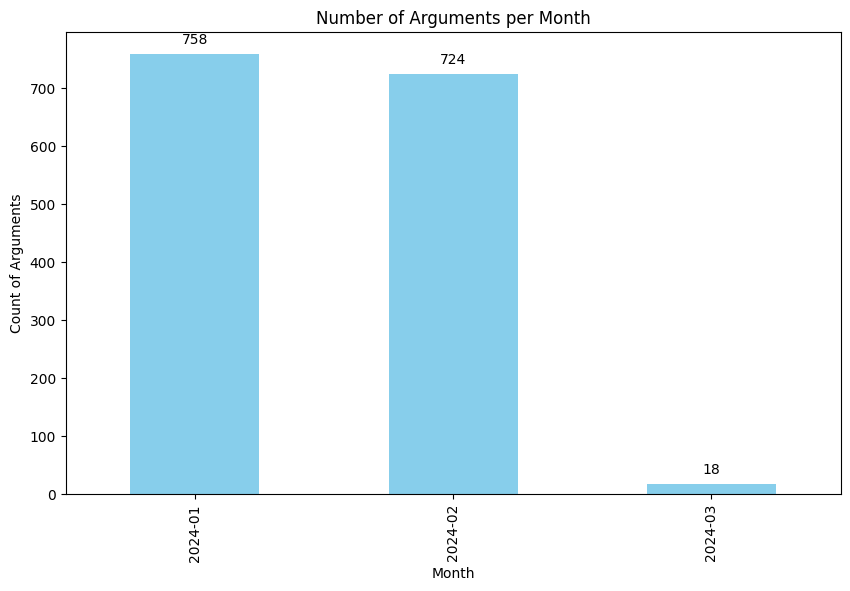

In [111]:
ax = monthly_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Number of Arguments per Month')
plt.ylabel('Count of Arguments')
plt.xlabel('Month')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [112]:
df.columns

Index(['Date', 'Duration (minutes)', 'Topic', 'Emotional Tone',
       'Resolution Type', 'Mood Swing', 'Notes', 'Topic_code',
       'Resolution_code', 'Mood_code', 'Year', 'Month', 'Day', 'DayOfWeek',
       'IsWeekend'],
      dtype='object')

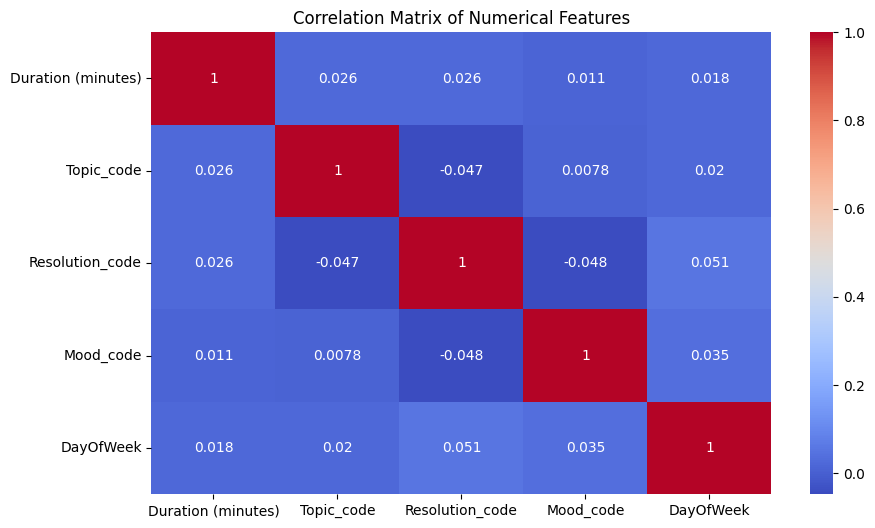

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Duration (minutes)', 'Topic_code', 'Resolution_code', 'Mood_code', 'DayOfWeek']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

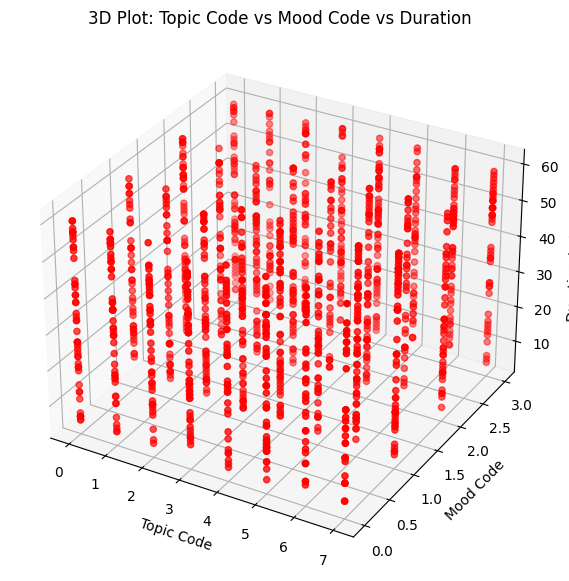

In [114]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Topic_code'], df['Mood_code'], df['Duration (minutes)'], c='r', marker='o')

ax.set_xlabel('Topic Code')
ax.set_ylabel('Mood Code')
ax.set_zlabel('Duration (minutes)')
plt.title('3D Plot: Topic Code vs Mood Code vs Duration')
plt.show()

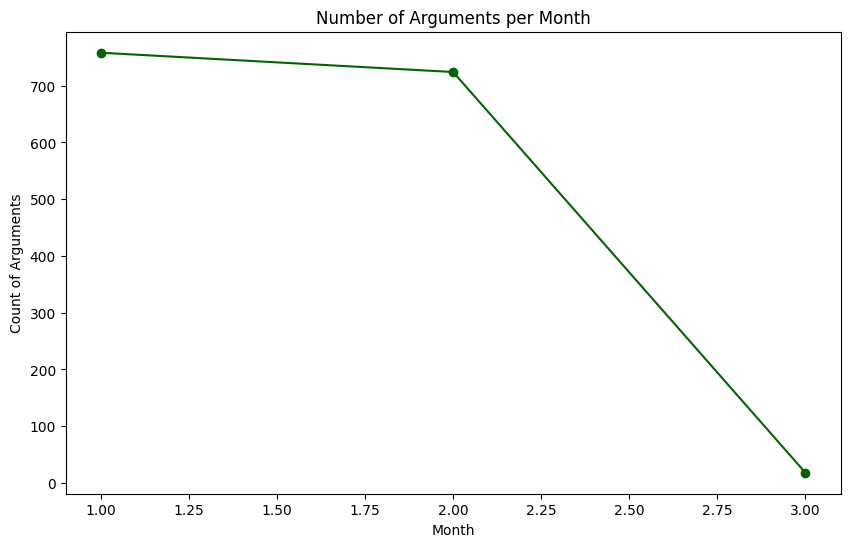

In [115]:
monthly_counts = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', color='darkgreen')
plt.title('Number of Arguments per Month')
plt.ylabel('Count of Arguments')
plt.xlabel('Month')
plt.show()

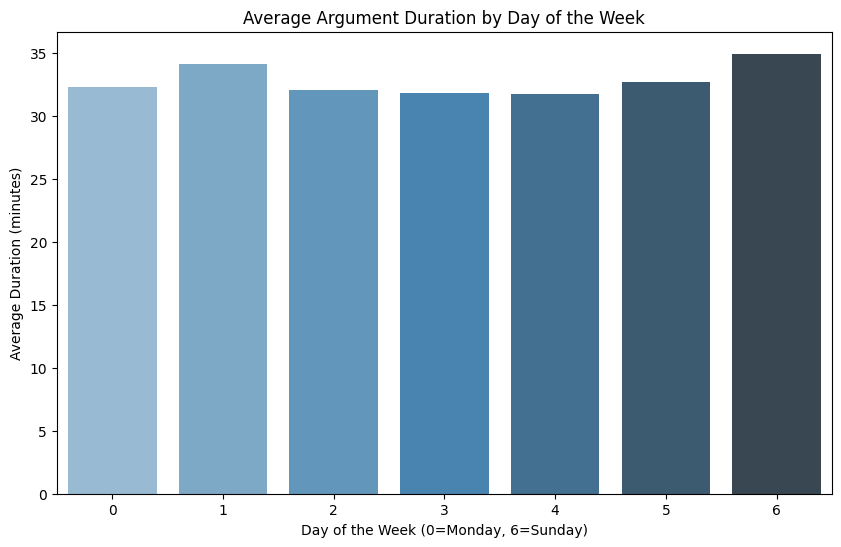

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Duration (minutes)', data=df, ci = None, palette='Blues_d')
plt.title('Average Argument Duration by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Duration (minutes)')
plt.show()

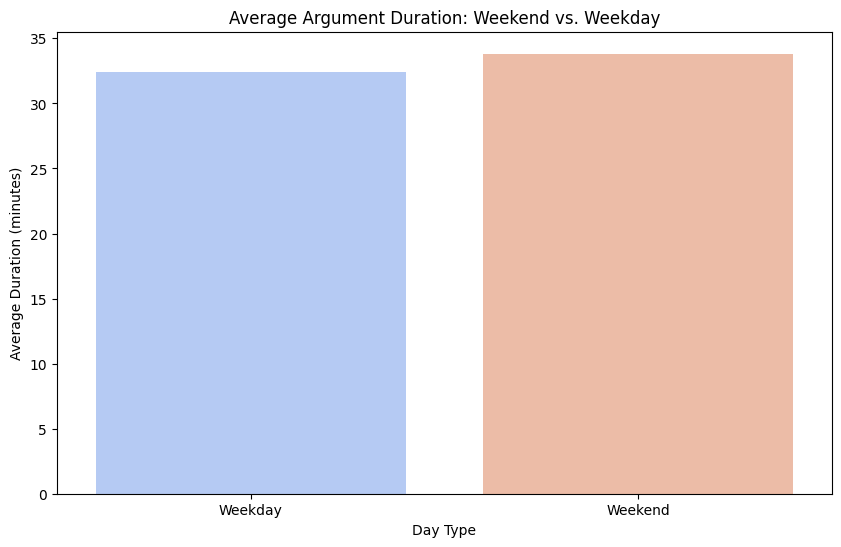

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x='IsWeekend', y='Duration (minutes)', data=df, ci = None, palette='coolwarm')
plt.title('Average Argument Duration: Weekend vs. Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('Average Duration (minutes)')
plt.show()

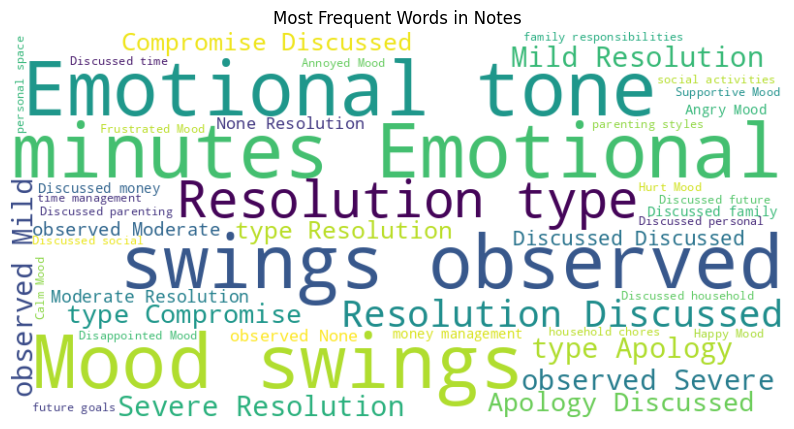

In [118]:
from wordcloud import WordCloud

text = ' '.join(df['Notes'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Notes')
plt.show()